In [1]:
pip install MiniSom


  Preparing metadata (setup.py) ... done
  Created wheel for MiniSom: filename=MiniSom-2.3.2-py3-none-any.whl size=10650 sha256=4225be4acf777eb4f5dd206d7df0845f2624106a03c107183f7e9baaa932b9df
  Stored in directory: /root/.cache/pip/wheels/b4/f6/8a/9daf8831901c3e3805775633404248f10663d1c80b7e5a1314
Successfully built MiniSom


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from minisom import MiniSom
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf

In [3]:
dataset = pd.read_csv("Credit_Card_Applications.csv")
X = dataset.iloc[:, :-1].values
Y = dataset.iloc[:, -1].values


In [4]:
sc = MinMaxScaler(feature_range=(0, 1))
X = sc.fit_transform(X)


In [5]:
som = MiniSom(x=10, y=10, input_len=15, sigma=1.0, learning_rate=0.5)
som.random_weights_init(X)
som.train_random(data=X, num_iteration=100)


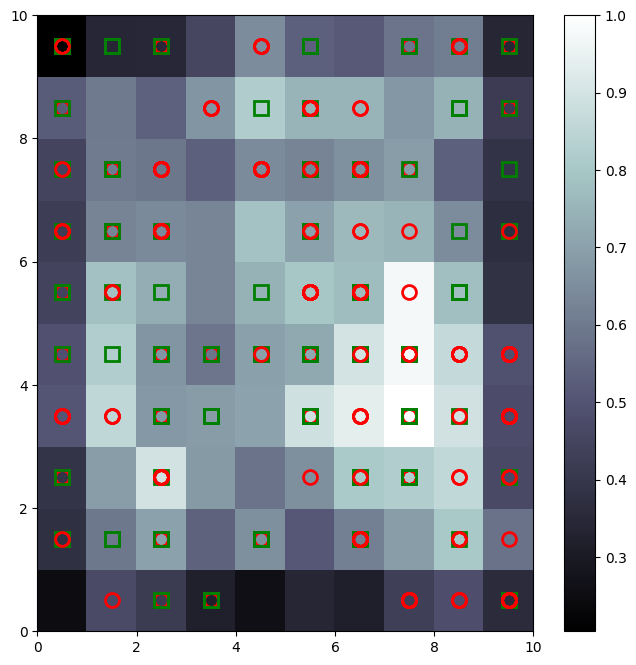

In [6]:
plt.figure(figsize=(8, 8))
plt.bone()
plt.pcolor(som.distance_map().T)
plt.colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plt.plot(w[0] + 0.5,
             w[1] + 0.5,
             markers[Y[i]],
             markeredgecolor=colors[Y[i]],
             markerfacecolor='None',
             markersize=10,
             markeredgewidth=2)
plt.show()


In [7]:
mappings = som.win_map(X)
frauds = np.concatenate((mappings[(1, 5)], mappings[(7, 6)]), axis=0)
frauds = sc.inverse_transform(frauds)


In [8]:
print("Potential Fraud Customer IDs:")
for i in frauds[:, 0]:
    print(int(i))


Potential Fraud Customer IDs:
15690772
15590234
15710138
15613673
15776921


In [9]:
customers = dataset.iloc[:, 1:].values

isfraud = np.zeros(len(dataset))
for i in range(len(dataset)):
    if dataset.iloc[i, 0] in frauds:
        isfraud[i] = 1


In [10]:
X_train, X_test, y_train, y_test = train_test_split(customers, isfraud, test_size=0.2, random_state=42)


In [11]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [12]:
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=2, activation='relu'))
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [13]:
ann.fit(X_train, y_train, batch_size=1, epochs=10)


Epoch 1/10
552/552 [==============================] - 2s 2ms/step - loss: 0.5251 - accuracy: 0.8098
Epoch 2/10
552/552 [==============================] - 1s 2ms/step - loss: 0.2553 - accuracy: 0.9710
Epoch 3/10
552/552 [==============================] - 1s 1ms/step - loss: 0.1546 - accuracy: 0.9982
Epoch 4/10
552/552 [==============================] - 1s 1ms/step - loss: 0.1056 - accuracy: 1.0000
Epoch 5/10
552/552 [==============================] - 1s 1ms/step - loss: 0.0767 - accuracy: 1.0000
Epoch 6/10
552/552 [==============================] - 1s 2ms/step - loss: 0.0575 - accuracy: 1.0000
Epoch 7/10
552/552 [==============================] - 1s 2ms/step - loss: 0.0426 - accuracy: 1.0000
Epoch 8/10
552/552 [==============================] - 1s 1ms/step - loss: 0.0296 - accuracy: 1.0000
Epoch 9/10
552/552 [==============================] - 1s 1ms/step - loss: 0.0180 - accuracy: 1.0000
Epoch 10/10
552/552 [==============================] - 1s 1ms/step - loss: 0.0111 - accuracy: 1.0000

In [14]:
test_loss, test_accuracy = ann.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')


5/5 [==============================] - 0s 4ms/step - loss: 0.2595 - accuracy: 0.9638
Test Loss: 0.2595343589782715, Test Accuracy: 0.9637681245803833


In [15]:
y_pred_test = ann.predict(X_test)
y_pred_test = np.concatenate((y_test.reshape(-1, 1), y_pred_test), axis=1)
y_pred_test = y_pred_test[y_pred_test[:, 1].argsort()]


5/5 [==============================] - 0s 3ms/step


In [16]:
print("Predictions for testing set:")
print(y_pred_test)


Predictions for testing set:
[[0.00000000e+00 4.06062117e-09]
 [0.00000000e+00 2.99892854e-05]
 [0.00000000e+00 4.45279002e-05]
 [0.00000000e+00 4.55662484e-05]
 [0.00000000e+00 5.65832852e-05]
 [0.00000000e+00 7.68735845e-05]
 [0.00000000e+00 8.63109599e-05]
 [0.00000000e+00 9.40844257e-05]
 [0.00000000e+00 1.03496139e-04]
 [0.00000000e+00 1.08639280e-04]
 [0.00000000e+00 1.16585805e-04]
 [0.00000000e+00 1.17343108e-04]
 [0.00000000e+00 1.17583702e-04]
 [0.00000000e+00 1.21267178e-04]
 [0.00000000e+00 1.41408527e-04]
 [0.00000000e+00 1.45682861e-04]
 [0.00000000e+00 1.49643951e-04]
 [0.00000000e+00 1.72438653e-04]
 [0.00000000e+00 1.79050679e-04]
 [1.00000000e+00 1.80353600e-04]
 [1.00000000e+00 1.89157479e-04]
 [0.00000000e+00 1.90306411e-04]
 [0.00000000e+00 2.02752737e-04]
 [0.00000000e+00 2.04862299e-04]
 [0.00000000e+00 2.06784738e-04]
 [0.00000000e+00 2.08238998e-04]
 [0.00000000e+00 2.09586316e-04]
 [0.00000000e+00 2.10845072e-04]
 [0.00000000e+00 2.12017520e-04]
 [0.00000000e+